In [23]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
model = cv2.imread('mypic.png',0)
withglass = cv2.imread('person.png',0)
group = cv2.imread('group.jpeg',0)

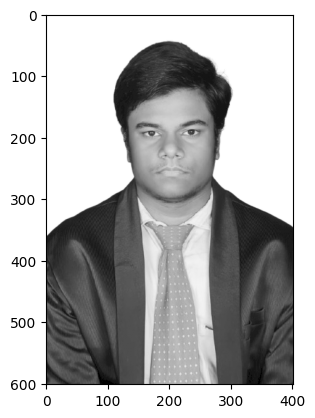

In [25]:
plt.imshow(model,cmap='gray')
plt.show()

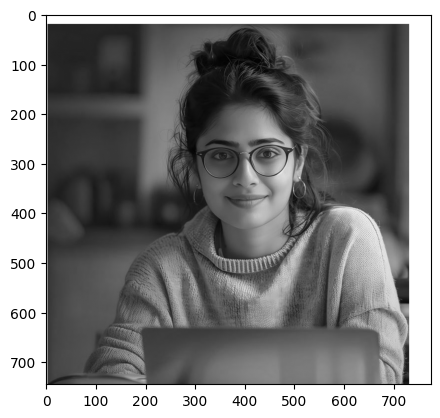

In [26]:
plt.imshow(withglass,cmap='gray')
plt.show()

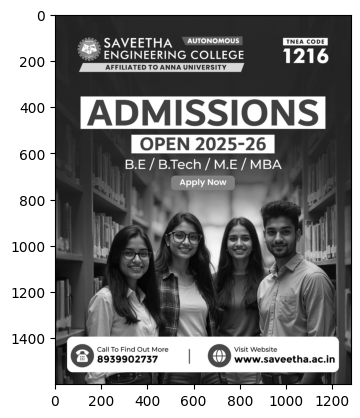

In [27]:
plt.imshow(group,cmap='gray')
plt.show()

In [28]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [29]:
def detect_face(img):
    
  
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

In [30]:
result = detect_face(withglass)

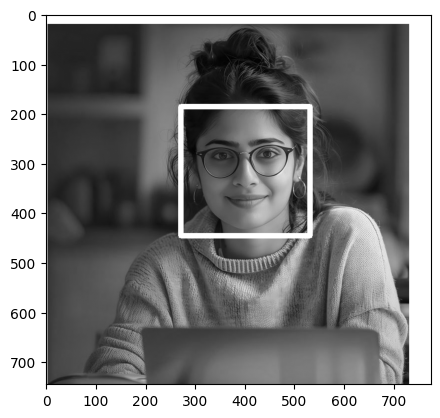

In [31]:
plt.imshow(result,cmap='gray')
plt.show()

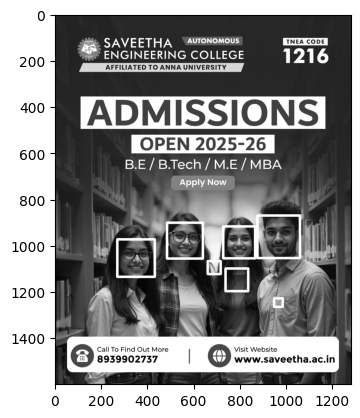

In [32]:
result = detect_face(group)
plt.imshow(result,cmap='gray')
plt.show()

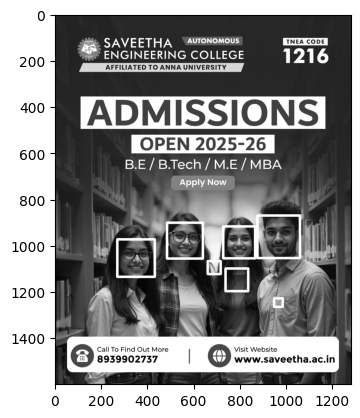

In [33]:
# Gets errors!
result = detect_face(group)
plt.imshow(result,cmap='gray')
plt.show()

In [34]:
def adj_detect_face(img):
    
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

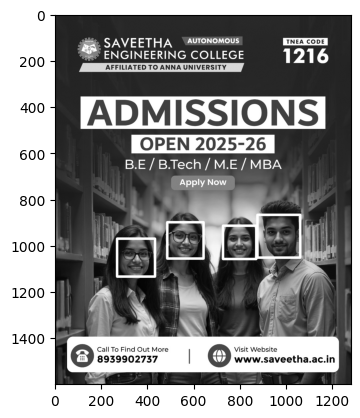

In [35]:
# Doesn't detect the side face.
result = adj_detect_face(group)
plt.imshow(result,cmap='gray')
plt.show()

In [36]:
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [37]:
def detect_eyes(img):
    
    face_img = img.copy()
  
    eyes = eye_cascade.detectMultiScale(face_img) 
    
    
    for (x,y,w,h) in eyes: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

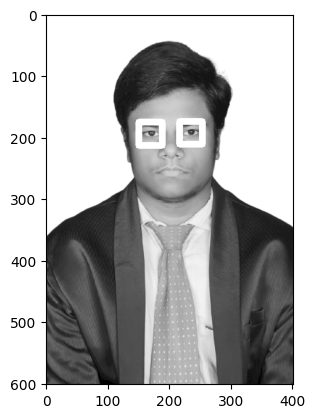

In [38]:
result = detect_eyes(model)
plt.imshow(result,cmap='gray')
plt.show()

In [39]:
eyes = eye_cascade.detectMultiScale(withglass) 

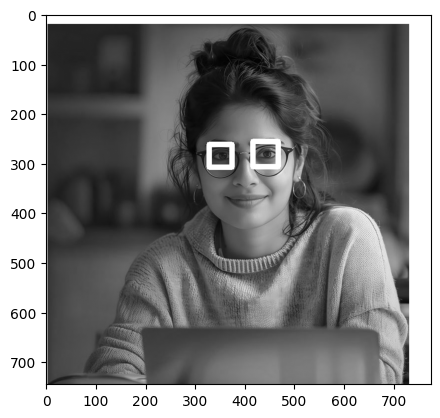

In [40]:
# White around the pupils is not distinct enough to detect Denis' eyes here!
result = detect_eyes(withglass)
plt.imshow(result,cmap='gray')
plt.show()

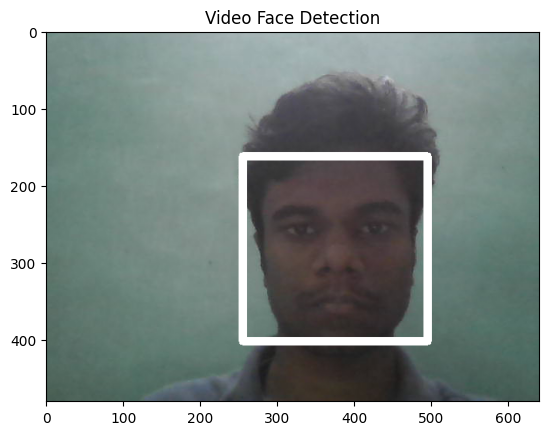

In [ ]:
cap = cv2.VideoCapture(0)

# Set up matplotlib
plt.ion()
fig, ax = plt.subplots()

ret, frame = cap.read(0)
frame = detect_face(frame)
im = ax.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title('Video Face Detection')

while True:
    ret, frame = cap.read(0)

    frame = detect_face(frame)

    # Update matplotlib image
    im.set_data(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.pause(0.10)

   

cap.release()
plt.close()